In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classical Machine Learning Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Deep Learning Library
from tensorflow import keras  # Assuming TensorFlow backend for Keras

# Other Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from keras.utils import to_categorical
from sklearn.utils import class_weight


## Load Data

In [18]:
train_df = pd.read_csv('E:\\Learn Data Science\\cardiac diagnostic\\dataset\\train.csv',header=None)
test_df = pd.read_csv('E:\\Learn Data Science\\cardiac diagnostic\\dataset\\test.csv',header=None)

## Explore Data

In [19]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [21]:
missing_values = train_df.isnull().sum()
print(missing_values)

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


In [23]:
label_counts = train_df[187].value_counts()
print(label_counts)

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


### Rename Last column class 

In [24]:

target_column_index = train_df.shape[1] - 1

class_labels = train_df[target_column_index].unique()

class_names = {
    0: "Normal Beats",
    1: "Supraventricular Ectopy Beats",
    2: "Ventricular Ectopy Beats",
    3: "Fusion Beats",
    4: "Unclassifiable Beats"
}

for label in class_labels:
    print(f"Class label {label}: {class_names[label]}")

Class label 0.0: Normal Beats
Class label 1.0: Supraventricular Ectopy Beats
Class label 2.0: Ventricular Ectopy Beats
Class label 3.0: Fusion Beats
Class label 4.0: Unclassifiable Beats


### Describe

In [26]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [29]:
train_df[187]=train_df[187].astype(float)
equilibre = train_df[187].value_counts()
print(equilibre)

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


In [30]:
test_df[187]=test_df[187].astype(float)
equilibre = test_df[187].value_counts()
print(equilibre)

187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64


### every class with its perecentages

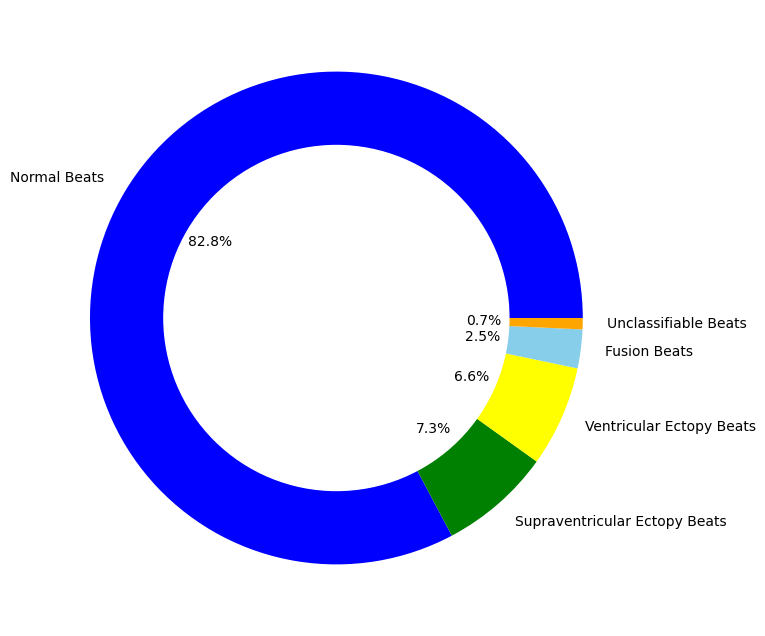

In [36]:
plt.figure(figsize=(15,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['Normal Beats','Supraventricular Ectopy Beats','Ventricular Ectopy Beats','Fusion Beats','Unclassifiable Beats'], colors=['Blue','Green','Yellow','Skyblue','Orange'],autopct='%1.1f%%', textprops={'color': 'black'})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Resample the training data to 20000 samples each class to make it more balance to work in it

In [37]:
df_1 = train_df[train_df[187] == 1]
df_2 = train_df[train_df[187] == 2]
df_3 = train_df[train_df[187] == 3]
df_4 = train_df[train_df[187] == 4]

In [38]:
from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)
df_0 = train_df[train_df[187]==0].sample(n =20000, random_state=123)
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

### After Resampling

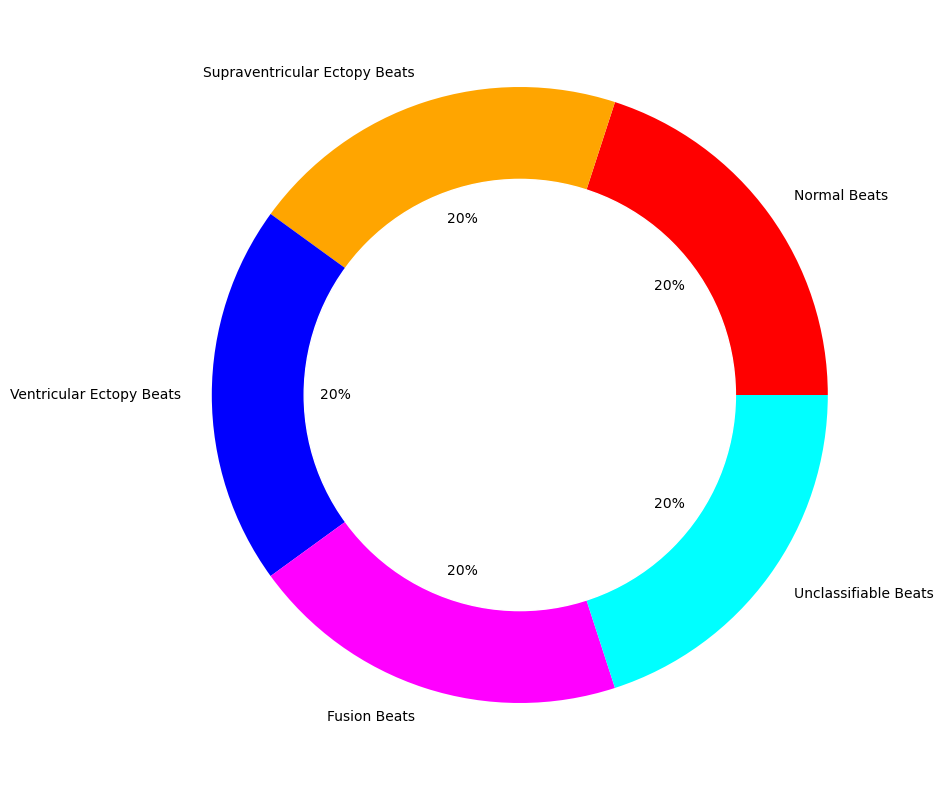

In [39]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_df[187].value_counts(), labels=['Normal Beats','Supraventricular Ectopy Beats','Ventricular Ectopy Beats','Fusion Beats','Unclassifiable Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [40]:
print(train_df[187].value_counts())
print(len(train_df[187].value_counts()))

187
0.0    20000
1.0    20000
2.0    20000
3.0    20000
4.0    20000
Name: count, dtype: int64
5


### Resample the testing data

In [41]:
df_1_t = test_df[test_df[187] == 1]
df_2_t = test_df[test_df[187] == 2]
df_3_t = test_df[test_df[187] == 3]
df_4_t = test_df[test_df[187] == 4]

In [42]:
from sklearn.utils import resample

df_1_upsample_t = resample(df_1, n_samples = 5000, replace = True, random_state = 123)
df_2_upsample_t = resample(df_2, n_samples = 5000, replace = True, random_state = 123)
df_3_upsample_t = resample(df_3, n_samples = 5000, replace = True, random_state = 123)
df_4_upsample_t = resample(df_4, n_samples = 5000, replace = True, random_state = 123)
df_0_t = test_df[test_df[187]==0].sample(n =5000, random_state=123)
test_df = pd.concat([df_0_t, df_1_upsample_t, df_2_upsample_t, df_3_upsample_t, df_4_upsample_t])

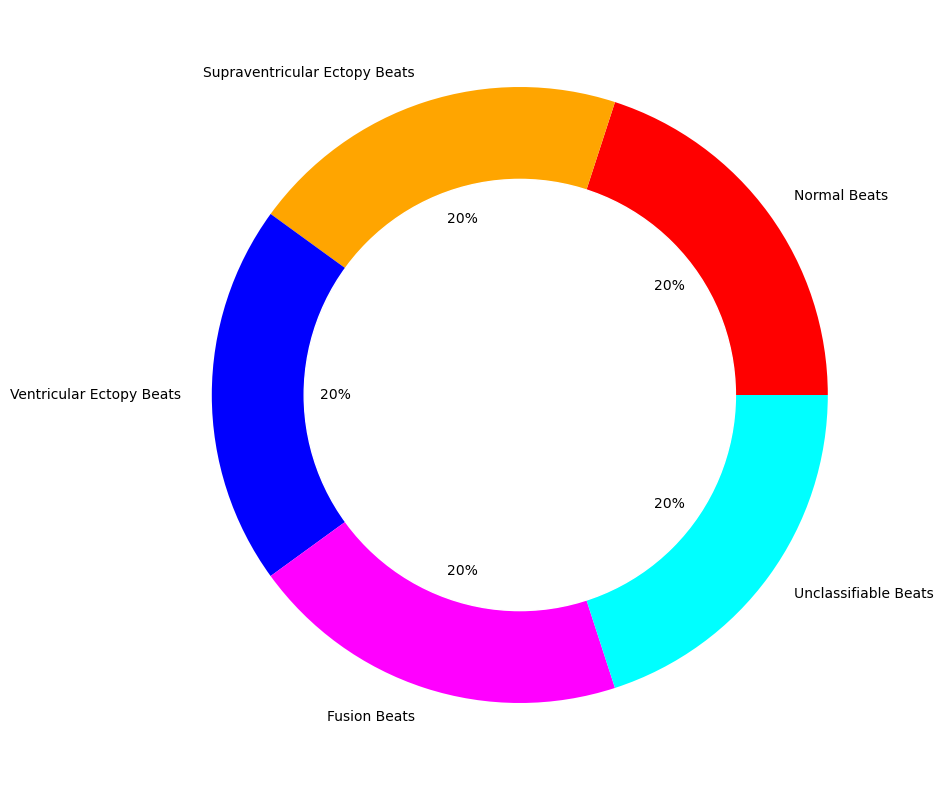

In [43]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(test_df[187].value_counts(), labels=['Normal Beats','Supraventricular Ectopy Beats','Ventricular Ectopy Beats','Fusion Beats','Unclassifiable Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Processing

In [45]:
# split features and labels
X_train = train_df.drop(columns = [187])
y_train = train_df[187]

In [47]:
# filtering
from scipy.signal import butter, filtfilt

ecg_data = train_df
ecg_signal = X_train
class_labels = y_train
sampling_rate = 125
def butter_lowpass_filter(data, cutoff_freq, fs, order=5):
    nyquist_freq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Example usage:
cutoff_frequency = 50  # Define the cutoff frequency in Hz
filtered_ecg_signal = butter_lowpass_filter(ecg_signal, cutoff_frequency, sampling_rate)

In [48]:
# Spliting the training dataset into train and valid
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Separate features and target variable for test dataset
X_test = test_df.drop(columns=[187])
y_test = test_df[187]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_normalized = scaler.fit_transform(X_train)
# Transform the valid data using the fitted scaler
X_valid_normalized = scaler.transform(X_valid)
# Transform the test data using the fitted scaler
X_test_normalized = scaler.transform(X_test)

print("Before Normalization:")
print(X_train.head(5))

print("After Normalization:")
print(X_train_normalized[:, 5])

Before Normalization:
            0         1         2         3         4         5         6    \
80646  1.000000  0.980880  0.600382  0.288719  0.181644  0.133843  0.114723   
76808  0.000000  0.018006  0.056787  0.135734  0.218837  0.270083  0.326870   
79759  0.000000  0.067395  0.131148  0.265938  0.404372  0.495446  0.557377   
34449  1.000000  0.940141  0.753521  0.362676  0.154930  0.102113  0.070423   
82406  0.845488  0.756490  0.653894  0.579728  0.489493  0.396786  0.307787   

            7         8         9    ...  177  178  179  180  181  182  183  \
80646  0.091778  0.082218  0.070746  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
76808  0.351801  0.405817  0.518006  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
79759  0.615665  0.677596  0.744991  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
34449  0.031690  0.007042  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
82406  0.228677  0.158220  0.122373  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       184  185  186  
80646

### fter resampling

In [49]:
train_df.head()


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
14967,1.0,0.647702,0.039387,0.004376,0.102845,0.063457,0.067834,0.048140,0.045952,0.045952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71482,1.0,0.946619,0.651246,0.330961,0.000000,0.067616,0.092527,0.163701,0.192171,0.177936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23543,1.0,0.855967,0.302469,0.041152,0.185185,0.160494,0.098765,0.092593,0.109053,0.088477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9174,1.0,0.838806,0.738806,0.641791,0.604478,0.583582,0.580597,0.580597,0.591045,0.577612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42319,1.0,0.720257,0.019293,0.106109,0.073955,0.086817,0.070740,0.077170,0.070740,0.083601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
train_df.shape


(100000, 188)

In [52]:
test_df.shape

(25000, 188)

# SVM Model 

In [54]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create the SVM classifier
svm_classifier = svm.SVC(kernel='rbf', random_state=42)

# Train the classifier on the normalized training data
svm_classifier.fit(X_train_normalized, y_train)

# Make predictions on the normalized validation set
y_pred_valid = svm_classifier.predict(X_valid_normalized)

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)

# Make predictions on the normalized test set
y_pred_test = svm_classifier.predict(X_test_normalized)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.94495
Test Accuracy: 0.94568


# Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=123)

# Train the classifier using extracted features and corresponding labels
rf_classifier.fit(X_train_normalized, y_train)

# Predict labels for validation data
y_pred_valid = rf_classifier.predict(X_valid_normalized)

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)

# Predict labels for test data
y_pred_test = rf_classifier.predict(X_test_normalized)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.99665
Test Accuracy: 0.9974


# Decision Tree Model

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create the Decision Tree classifier
clf_dt = DecisionTreeClassifier(random_state=42)

# Train the classifier on the normalized training data
clf_dt.fit(X_train_normalized, y_train)

# Make predictions on the normalized validation set
y_pred_valid = clf_dt.predict(X_valid_normalized)

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)

# Make predictions on the normalized test set
y_pred_test = clf_dt.predict(X_test_normalized)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.98505
Test Accuracy: 0.98592


### voting classifier 

In [57]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create the voting ensemble
voting_clf = VotingClassifier(estimators=[('decision_tree', clf_dt), ('rf', rf_classifier), ('support_vector_machine', svm_classifier)], voting='hard')

# Train the voting ensemble on the normalized training data
voting_clf.fit(X_train_normalized, y_train)

# Make predictions on the normalized validation set
y_pred_valid = voting_clf.predict(X_valid_normalized)

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)

# Make predictions on the normalized test set
y_pred_test = voting_clf.predict(X_test_normalized)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.99515
Test Accuracy: 0.99588
